### Figure 3d

In [7]:
END_YR=70
VARNAME='tas'
CMIP_NAMES=['CMIP6']
import multi_model_stats
import step1_create_processed_data_dict
PROC_DATA_DICT = step1_create_processed_data_dict.create_variable_dictionary(runname_inds=[3, 2, 1, 0],
                                                                             varname='tas',
                                                                             cdict_names=['CMIP5','CMIP6'])

[ds_all_models_phys,
 multimodelSum_phys,
 positiveChangeCount_phys,
 negativeChangeCount_phys,
 num_models_with_data_phys] = multi_model_stats.get_mm_mean(proc_data_dict=PROC_DATA_DICT,
                                                            varname=VARNAME,
                                                            end_yr=END_YR,
                                                            change_cutoff=0,
                                                            runname_inds=[2,0], #TOT-RAD: [2,0], PHYS-PI:[1,3]
                                                            cmip_names = CMIP_NAMES) 

[ds_all_models_rad,
 multimodelSum_rad,
 positiveChangeCount_rad,
 negativeChangeCount_rad,
 num_models_with_data_rad] = multi_model_stats.get_mm_mean(proc_data_dict=PROC_DATA_DICT,
                                                           varname=VARNAME,
                                                            end_yr=END_YR,
                                                            change_cutoff=0,
                                                           runname_inds=[0,3], #[2,1], #TOT-PHYS: [2,1], RAD-PI: [0,3]
                                                          cmip_names = CMIP_NAMES)

CNRM-ESM2-1
BCC-CSM2-MR
CanESM5
CESM2
GISS-E2-1-G
UKESM1-0-LL
GFDL-ESM4
IPSL-CM6A-LR
MIROC-ES2L
CNRM-ESM2-1
BCC-CSM2-MR
CanESM5
CESM2
GISS-E2-1-G
UKESM1-0-LL
GFDL-ESM4
IPSL-CM6A-LR
MIROC-ES2L


1.6186528863682257
1.5669928901990535
1.598004285914897
CNRM-ESM2-1
BCC-CSM2-MR
CanESM5
CESM2
GISS-E2-1-G
UKESM1-0-LL
GFDL-ESM4
IPSL-CM6A-LR
MIROC-ES2L


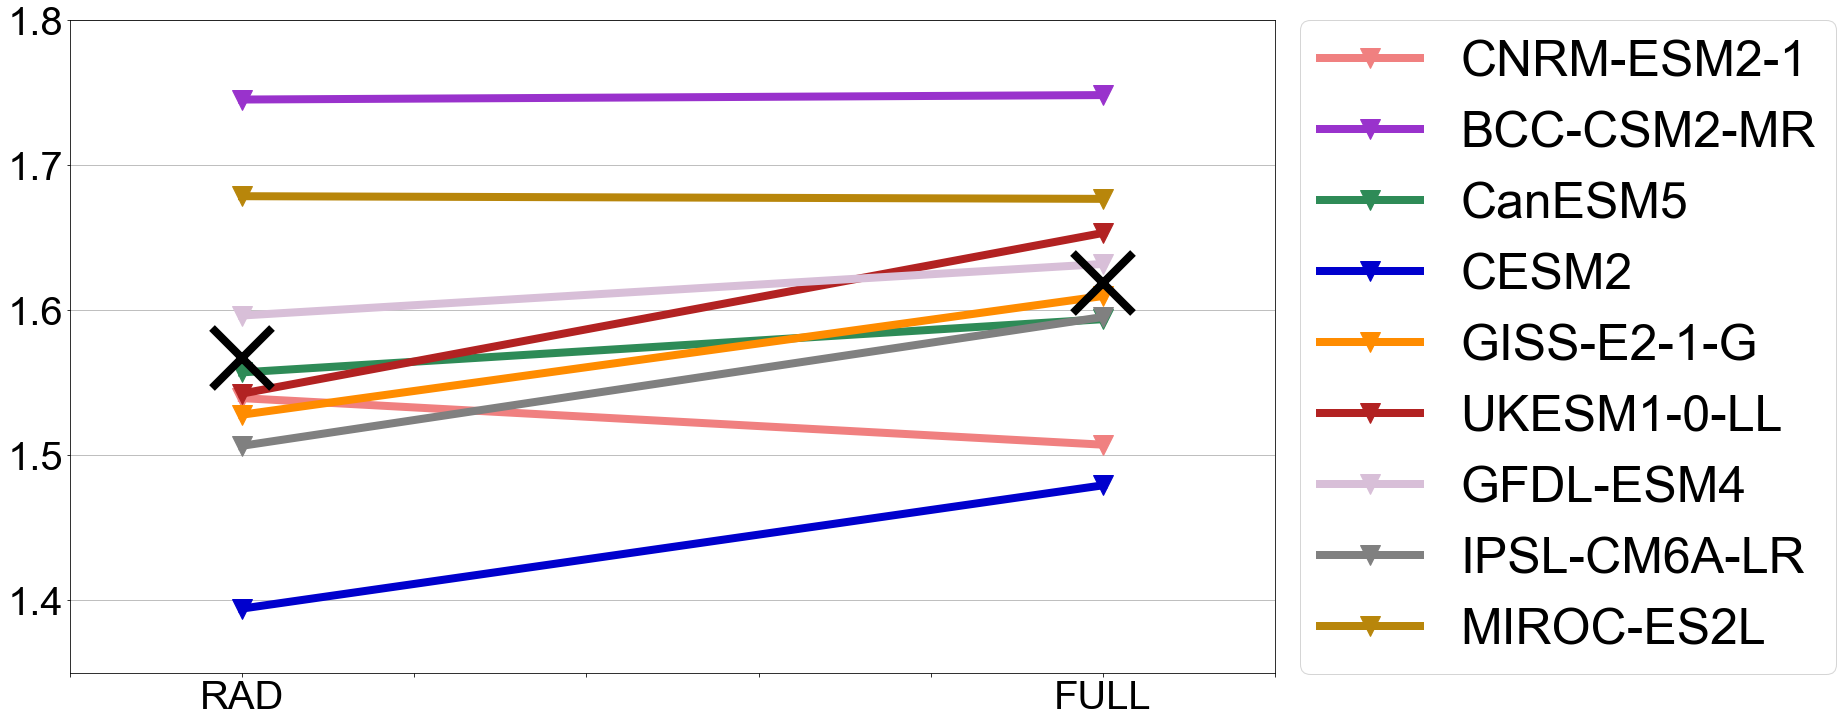

In [12]:
land_tcrs['RAD_v2'] = land_tcrs['TOT']-land_tcrs['PHYS']
nonland_tcrs['RAD_v2'] = nonland_tcrs['TOT']-nonland_tcrs['PHYS']
filepath=FIGURE_PATH+'land_ocean_T_contrast'
####### Get data

yvals1 = land_tcrs['TOT']/nonland_tcrs['TOT']
yvals2 = land_tcrs['RAD']/nonland_tcrs['RAD']
yvals3 = land_tcrs['RAD_v2']/nonland_tcrs['RAD_v2']
LINEWIDTH=8

######------------------Make Figure

fig, ax = plt.subplots(figsize=(24,12))
plt.rcParams.update({'font.size': 50})

multimodel_mean1 = np.nanmean(yvals1)
multimodel_mean2 = np.nanmean(yvals2)
multimodel_mean3 = np.nanmean(yvals3)
print(multimodel_mean1)
print(multimodel_mean2)
print(multimodel_mean3)

for i in range(8,len(yvals1)):
    print(modelnames[i])
    plt.plot([2],yvals1[i],
             marker=symbols[i],fillstyle='full',color=colors[i],linestyle=linesymbols[i],
             label=modelnames[i], markersize=MARKERSIZE, linewidth=LINEWIDTH)
    plt.plot([1],yvals2[i],
             marker=symbols[i],fillstyle='full',color=colors[i],linestyle=linesymbols[i],
             markersize=MARKERSIZE, linewidth=LINEWIDTH)
    plt.plot([2,1],[yvals1[i], yvals2[i]], 
             color=colors[i],linestyle=linesymbols[i], linewidth=LINEWIDTH)
    
    #if ((modelnames[i]=='BCC-CSM2-MR') or (modelnames[i]=='CNRM-ESM2-1')):
    #    plt.plot([1],yvals3[i],
    #         marker=symbols[i],fillstyle='none',color=colors[i],linestyle=linesymbols[i],
    #         markersize=MARKERSIZE, linewidth=LINEWIDTH)
    #    plt.plot([2,1],[yvals1[i], yvals3[i]], 
    #         color=colors[i],linestyle=':', linewidth=LINEWIDTH)
    

plt.plot([2], [multimodel_mean1], 'x', markeredgewidth=LINEWIDTH, markersize=MARKERSIZE*3, color='black')
plt.plot([1], [multimodel_mean2], 'x', markeredgewidth=LINEWIDTH, markersize=MARKERSIZE*3, color='black')
plt.plot([3], [multimodel_mean3], 'x', markeredgewidth=LINEWIDTH, markersize=MARKERSIZE*3, color='black')
plt.grid(axis='y')
plt.ylim([1.35,1.8])
plt.xlim([0.9, 2.1])
#plt.ylabel('Land/Ocean Temperature Ratio')
locs, labels = plt.xticks()
new_xlabels=['','RAD','','','','','FULL']
plt.xticks(locs, new_xlabels)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

if filepath is not None:
    fig.savefig(filepath+'.png', bbox_inches='tight')